In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['black', 'darkred', 'darkolivegreen', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [10]:
data = pd.read_csv('distance.csv').drop_duplicates()
data

,rngRun,nStations,distance,linksNumber,loss,jitter,latency,throughput
0,407456,4,1,1,16.4555,0.000687,0.609092,108.6080
1,407456,4,3,1,16.4555,0.000687,0.609092,108.6080
2,407456,4,1,2,16.6015,0.000688,0.704477,108.4180
3,407456,4,1,3,16.9709,0.000690,0.679760,107.9380
4,407456,4,3,2,16.6015,0.000688,0.704477,108.4180
...,...,...,...,...,...,...,...,...
184,407458,4,41,1,65.8592,0.001602,3.316360,44.3831
185,407458,4,37,3,87.4748,0.002612,3.884650,16.2828
186,407458,4,41,2,65.9610,0.001582,3.281940,44.2507
187,407458,4,39,3,95.7958,0.004635,4.024050,5.4654


C:\Users\Admin\AppData\Local\Temp\ipykernel_43376\3822814763.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


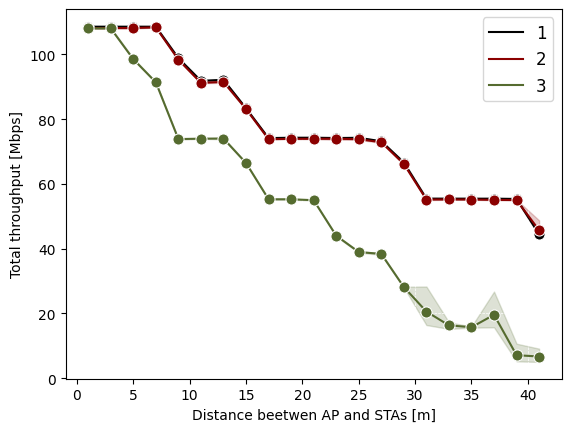

In [4]:
plot_sum = data.groupby(['distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dist_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_43376\2798601766.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


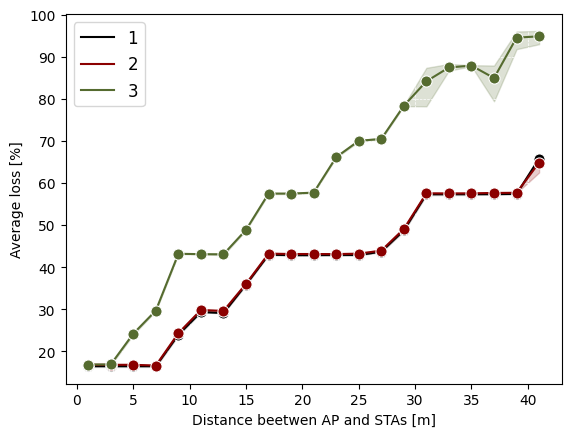

In [5]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Average loss [%]')
plt.savefig('dist_loss.svg', bbox_inches='tight')

In [6]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_43376\2938041597.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


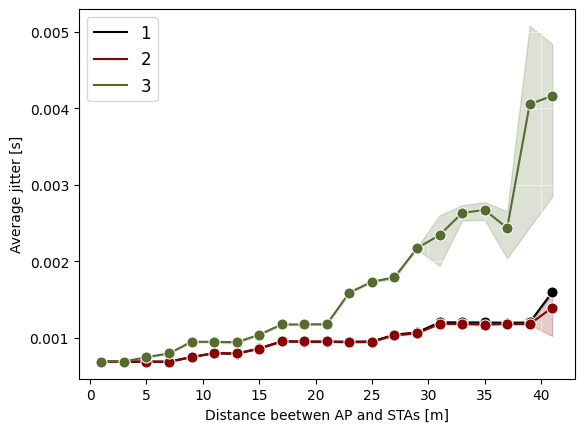

In [7]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Average jitter [s]')
plt.savefig('dist_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_43376\2740282522.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


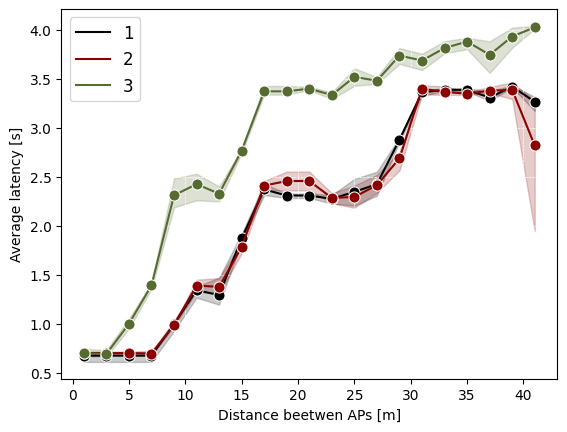

In [8]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Average latency [s]')
plt.savefig('dist_lat.svg', bbox_inches='tight')